In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

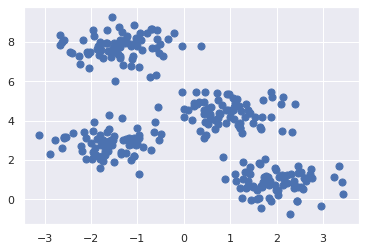

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

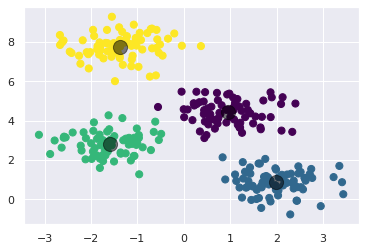

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
class KMeans:
    
    def __init__(self, k, method='k-means++', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        self.random_state = 4
    
    def init_centers(self, X):
        np.random.RandomState(self.random_state)
        if self.method == 'random':
            index = np.random.permutation(X.shape[0])
            centroids = X[index[:self.k]]
            return centroids
        if self.method == 'k-means++':
            centroids = []
            centroids.append(X[np.random.randint(X.shape[0]), :])
            "hint: for k in range(self.k-1):"
            for k in range(self.k - 1):
                distance = []
                for i in range(X.shape[0]):
                    point = X[i, :]
                    d = 10 ** 10
                    for j in range(len(centroids)):
                        temp_distance = np.sum((point - centroids[j]) ** 2)
                        d = min(d, temp_distance)
                    distance.append(d)
                distance = np.array(distance)
                next_centroid = X[np.argmax(distance), :]
                centroids.append(next_centroid)
            return np.array(centroids)
            
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            self.old_centroids = self.centroids
            self.centroids = self.maximization(X, clusters)
            if np.all(self.old_centroids == self.centroids):
                break

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def expectation(self, X, centroids):
        clusters = [[] for i in range(self.k)]
        label = np.argmin(self.compute_distance(X, centroids),  axis=1)
        for j in range(len(clusters)):
            if np.any(X[label == j, :]):
                clusters[j].append(X[label == j, :])
        return clusters

    def maximization(self, X, clusters):
        self.centroids = self.init_centers(X)
        new_centroids = self.centroids.copy()
        for k in range(self.k):
            new_centroids[k, :] = np.mean(clusters[k][0], axis=0)
        return new_centroids

    def predict(self, X):
        predictions = []
        distance = self.compute_distance(X, self.old_centroids)
        predictions.append(np.argmin(distance, axis=1))
        return np.array(predictions)
  

In [6]:
  kmeans = KMeans(k=4)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

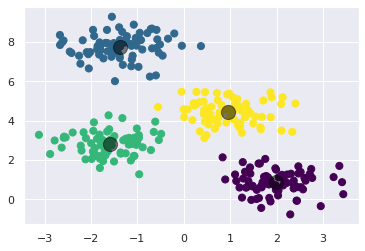

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);